# CS-6570 Lecture 11 - Resampling

**Dylan Zwick**

*Weber State University*

Today, we're going to talk about resampling, and in particular bootstrapping. Bootstrapping is a technique that is extremely widely used in machine learning and statistical analysis, and honestly seems like cheating. But it's not. There are sound mathematical reasons behind it, it can be used in a huge number of situations, it's straightforward (if you've got enough computation power), and it works.

The idea behind the bootstrap is that when we take a sample of our population, we can then make estimates about certain characteristics of our population. To get a better idea of what those characteristics are, we'd like to be able to take a bunch of samples, and look at how those estimates change from sample to sample. The problem is, sampling can be expensive and time consuming, and so we've usually only got one dataset. Is there anything we can do to get an estimate for how robust our estimates are, and what the actual population values might be?

Turns out, there is. It's called "bootstrapping", and the name is based upon the notion of "pulling yourself up by your own bootstraps", an impossibility that more broadly means doing what you can to improve yourself with the only resources you have available.

Alright, so what is bootstrapping? The idea behind bootstrapping is that you build a different sample from the one and only sample that you have. What? How in the world do you do that? Well, you do it through resampling *with replacement*. So, you resamble from your existing sample, but you allow for the possibility for a given value to be chosen more than once.

Let's first take a look at this using some simulated data.

In [12]:
#We'll import our favorite libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#We'll import the random number genearting library "random". We'll also import a library with standard statistical functions.
import random
import statistics

#We'll set a random "seed" so that we'll get the same "random" numbers generated every time we run this code.
random.seed(42)

#The function random.gauss returns a random number from a Gaussian (a.ka.a normal) distribution
#with mean mu and standand deviation sigma.
random.gauss(mu = 10, sigma = 3)

9.567729011266215

We'll grab 1000 random samples from a Gaussian distribution, and then we'll repeat this 1000 times. (1000^1000)

In [13]:
avg = 10
stdev = 3

samples = []

for i in range(1000):
    sample = []
    for j in range(1000):
        sample.append(random.gauss(mu = avg, sigma = stdev))
    samples.append(sample)
    
sample_averages = []
for i in range(0,1000):
    sample_averages.append(statistics.mean(samples[i]))

9.995356941043026


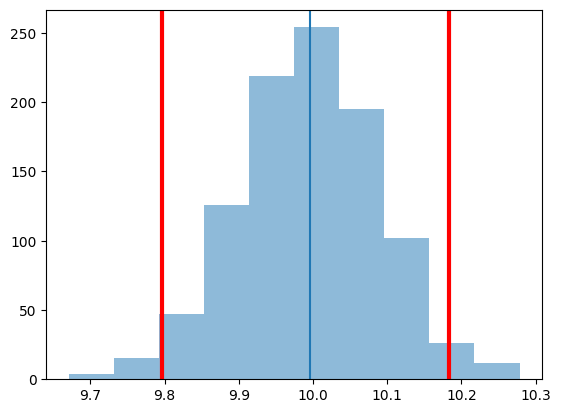

In [14]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(statistics.mean(x))
    # 95% confidence interval 
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

plot_hist(sample_averages)
print(statistics.mean(sample_averages))

In bootstrapping, what we do instead is start with a single sample, and we resamble from that with replacement.

9.972020422292013


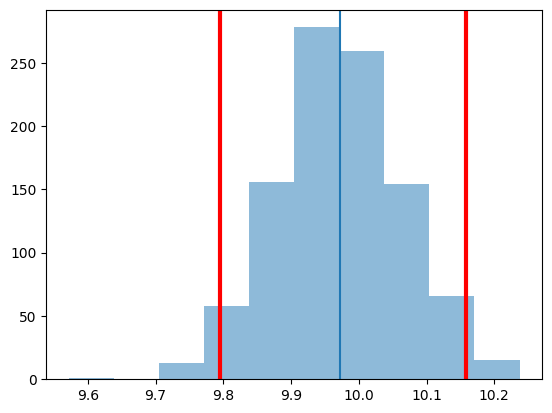

In [15]:
rand_sample = samples[random.randint(0,999)]

samples = []

for i in range(1000):
    sample = []
    for j in range(1000):
        sample.append(rand_sample[random.randint(0,999)])
    samples.append(sample)
    
sample_averages = []
for i in range(0,1000):
    sample_averages.append(statistics.mean(samples[i]))
    
plot_hist(sample_averages)
print(statistics.mean(sample_averages))

OK, let's take a look at using Bootstrapping with an actual dataset, and not one synthetically generated. We'll use Galton's height dataset, famous for giving us the term "regression to the mean".

In [16]:
galton = pd.read_csv('Datasets/galton.tab', sep='\t')[['gender','height']]
galton.head()

,gender,height
0,M,73.2
1,F,69.2
2,F,69.0
3,F,69.0
4,M,73.5


We can subset the dataframe by gender to get the number of men and women in the dataset. This will create two data sets, one called male and one called female.

In [17]:
male = galton[galton.gender == 'M']
female = galton[galton.gender == 'F']
len(male),len(female)

(465, 433)

Now, we can plot these histograms:

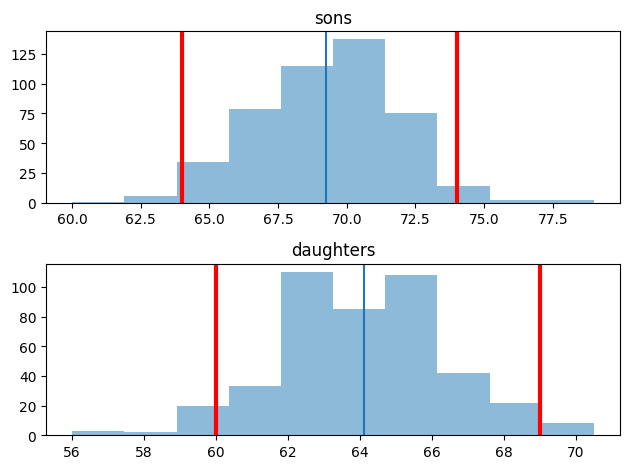

In [18]:
def plot_dists(a, b, nbins=20, a_label='pop_A', b_label='pop_B', p=5):
 # Create a single sequence of bins to be shared across both
 # distribution plots for visualization consistency.
 combined = pd.concat([a, b])
 breaks = np.linspace(
     combined.min(), 
     combined.max(), 
     num=nbins+1)
 plt.subplot(2, 1, 1)
 plot_hist(a)
 plt.title(a_label)
 
 plt.subplot(2, 1, 2)
 plot_hist(b)
 plt.title(b_label)
 
 plt.tight_layout()
 
plot_dists(male.height, female.height, a_label='sons', b_label='daughters')
plt.show()

The thing to note here is there is significant overlap between sons and daughters. We can see that the daughters are on average smaller than the sons, but is this overlap significant? We can use the bootstrap to investigate.

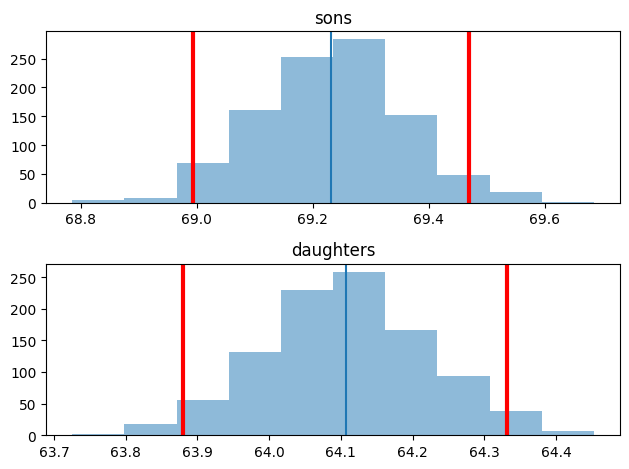

In [19]:
n_replicas = 1000

female_bootstrap_means = pd.Series([
    female.sample(frac=1, replace=True).height.mean()
    for i in range(n_replicas)])
male_bootstrap_means = pd.Series([
    male.sample(frac=1, replace=True).height.mean()
    for i in range(n_replicas)])
plot_dists(male_bootstrap_means, female_bootstrap_means, a_label='sons', b_label='daughters')
plt.show()

The distribution of the bootstrap means does not overlap at all! So, we can be much more confident that our means are significantly different.